<a href="https://colab.research.google.com/github/softmurata/colab_notebooks/blob/main/object_detection/cutler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone --recursive https://github.com/facebookresearch/CutLER

Cloning into 'CutLER'...
remote: Enumerating objects: 180, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 180 (delta 18), reused 15 (delta 7), pack-reused 137
Receiving objects: 100% (180/180), 21.37 MiB | 29.94 MiB/s, done.
Resolving deltas: 100% (46/46), done.
Submodule 'third_party/TokenCut' (https://github.com/YangtaoWANG95/TokenCut.git) registered for path 'third_party/TokenCut'
Cloning into '/content/CutLER/third_party/TokenCut'...
remote: Enumerating objects: 209, done.        
remote: Counting objects: 100% (59/59), done.        
remote: Compressing objects: 100% (35/35), done.        
remote: Total 209 (delta 40), reused 32 (delta 23), pack-reused 150        
Receiving objects: 100% (209/209), 7.29 MiB | 9.70 MiB/s, done.
Resolving deltas: 100% (79/79), done.
Submodule path 'third_party/TokenCut': checked out '5eba77f56f0fc92ffc79589d0cbb119aab5f9b2d'


In [2]:
%cd CutLER/

/content/CutLER


In [3]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
!pip install git+https://github.com/cocodataset/panopticapi.git
!pip install git+https://github.com/mcordts/cityscapesScripts.git
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-vg3ojp_e
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-vg3ojp_e
  Resolved https://github.com/facebookresearch/detectron2.git to commit dc9ad7055b48f25ab0a13e817c1a427b1385f98a
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.5/431.5 KB 38.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 KB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=607570f6c765f41f7c2ed354986ed84e781fb889d6c3ff805f16dca794b1932f
  Stored in directory: /root/.cache/pip/wheels/bc/f4/d9/8b3c3f254c28aa2daf5e2f5a8070b0a960278

In [4]:
%cd cutler/demo

/content/CutLER/cutler/demo


In [5]:
import argparse
import multiprocessing as mp
import numpy as np
import os
import tempfile
import time
import cv2
import matplotlib.pyplot as plt

from detectron2.config import get_cfg
from detectron2.data.detection_utils import read_image
from detectron2.utils.logger import setup_logger
import sys
sys.path.append('./')
sys.path.append('../')
from config import add_cutler_config
from predictor import VisualizationDemo

In [6]:
def setup_cfg(args):
    # load config from file and command-line arguments
    cfg = get_cfg()
    add_cutler_config(cfg)
    # To use demo for Panoptic-DeepLab, please uncomment the following two lines.
    # from detectron2.projects.panoptic_deeplab import add_panoptic_deeplab_config  # noqa
    # add_panoptic_deeplab_config(cfg)
    cfg.merge_from_file(args.config_file)
    cfg.merge_from_list(args.opts)
    # Disable the use of SyncBN normalization when running on a CPU
    # SyncBN is not supported on CPU and can cause errors, so we switch to BN instead
    if cfg.MODEL.DEVICE == 'cpu' and cfg.MODEL.RESNETS.NORM == 'SyncBN':
        cfg.MODEL.RESNETS.NORM = "BN"
        cfg.MODEL.FPN.NORM = "BN"
    # Set score_threshold for builtin models
    cfg.MODEL.RETINANET.SCORE_THRESH_TEST = args.confidence_threshold
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = args.confidence_threshold
    cfg.MODEL.PANOPTIC_FPN.COMBINE.INSTANCES_CONFIDENCE_THRESH = args.confidence_threshold
    cfg.freeze()
    return cfg

In [7]:
def get_parser(inputs):
    parser = argparse.ArgumentParser(description="Detectron2 demo for builtin configs")
    parser.add_argument(
        "--config-file",
        default="configs/quick_schedules/mask_rcnn_R_50_FPN_inference_acc_test.yaml",
        metavar="FILE",
        help="path to config file",
    )
    parser.add_argument("--webcam", action="store_true", help="Take inputs from webcam.")
    parser.add_argument("--video-input", help="Path to video file.")
    parser.add_argument(
        "--input", help="path to the input image",
    )
    parser.add_argument(
        "--output",
        help="A file or directory to save output visualizations. "
        "If not given, will show output in an OpenCV window.",
    )
    parser.add_argument(
        "--confidence-threshold",
        type=float,
        default=0.35,
        help="Minimum score for instance predictions to be shown",
    )
    parser.add_argument(
        "--opts",
        help="Modify config options using the command-line 'KEY VALUE' pairs",
        default=[],
        nargs=argparse.REMAINDER,
    )
    args = parser.parse_args(inputs)
    return args

In [8]:
!wget http://dl.fbaipublicfiles.com/cutler/checkpoints/cutler_cascade_final.pth

--2023-02-06 02:38:32--  http://dl.fbaipublicfiles.com/cutler/checkpoints/cutler_cascade_final.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.74.142, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 574672112 (548M) [binary/octet-stream]
Saving to: ‘cutler_cascade_final.pth’

cutler_cascade_fina 100%[===================>] 548.05M  30.7MB/s    in 15s     

2023-02-06 02:38:47 (35.9 MB/s) - ‘cutler_cascade_final.pth’ saved [574672112/574672112]



In [9]:
# provide arguments for running CutLER demo.

# Note: to run on cpu, add "MODEL.DEVICE", "cpu" after --opts. to run on GPU, remove "MODEL.DEVICE", "cpu".
# Note: please specify a path with "--input" if you want to try your own images.
# Note: you can use a lower --confidence-threshold to get a higher recall.
mp.set_start_method("spawn", force=True)
inputs = ['--config-file', "../model_zoo/configs/CutLER-ImageNet/cascade_mask_rcnn_R_50_FPN.yaml", '--input', "imgs/demo1.jpg", '--confidence-threshold', '0.5', "--opts", "MODEL.WEIGHTS", "cutler_cascade_final.pth", "MODEL.DEVICE", "cpu"]
args = get_parser(inputs)

In [10]:
setup_logger(name="fvcore")
logger = setup_logger()
logger.info("Arguments: " + str(args))
cfg = setup_cfg(args)
demo = VisualizationDemo(cfg)

[02/06 02:38:53 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='../model_zoo/configs/CutLER-ImageNet/cascade_mask_rcnn_R_50_FPN.yaml', input='imgs/demo1.jpg', opts=['MODEL.WEIGHTS', 'cutler_cascade_final.pth', 'MODEL.DEVICE', 'cpu'], output=None, video_input=None, webcam=False)
[02/06 02:38:55 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from cutler_cascade_final.pth ...
[02/06 02:38:55 fvcore.common.checkpoint]: [Checkpointer] Loading from cutler_cascade_final.pth ...


In [11]:
# use PIL, to be consistent with evaluation
img = read_image(args.input, format="BGR")
start_time = time.time()
predictions, visualized_output = demo.run_on_image(img)
logger.info(
    "{}: {} in {:.2f}s".format(
        args.input,
        "detected {} instances".format(len(predictions["instances"]))
        if "instances" in predictions
        else "finished",
        time.time() - start_time,
    )
)

# save image to your local directory
if args.output:
    if os.path.isdir(args.output):
        assert os.path.isdir(args.output), args.output
        out_filename = os.path.join(args.output, os.path.basename(args.input))
    else:
        assert len(args.input) == 1, "Please specify a directory with args.output"
        out_filename = args.output
    visualized_output.save(out_filename)

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[02/06 02:39:13 detectron2]: imgs/demo1.jpg: detected 39 instances in 12.49s


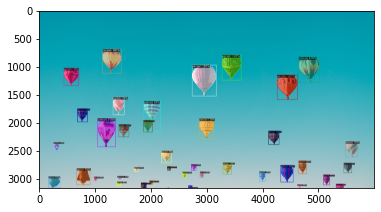

In [12]:
plt.imshow(visualized_output.get_image())